In [1]:
import os
import pickle

PROJECT_DIR="."
CHAPTER_ID="Visualizations"
IMAGES_PATH= os.path.join(PROJECT_DIR, "Images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path=os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print(f" Figure '{fig_id}' Saved.")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set();


from xgboost import XGBClassifier
import lightgbm as gbm

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, LabelBinarizer, PolynomialFeatures, OrdinalEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report



In [3]:
train=pd.read_csv('Datasets/train.csv', encoding='iso-8859-1', on_bad_lines='skip')
test=pd.read_csv('Datasets/Test.csv', encoding='iso-8859-1', on_bad_lines='skip')

In [4]:
print(f"The shape of the train data: {train.shape}\nThe shape of the test data: {test.shape}")

The shape of the train data: (18506, 21)
The shape of the test data: (6169, 20)


In [5]:
train.head()

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category
0,tour_id1hffseyw,ITALY,45-64,With Children,0.0,2.0,Visiting Friends and Relatives,Beach Tourism,"Friends, relatives",Package Tour,...,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost
1,tour_idnacd7zag,UNITED KINGDOM,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost
2,tour_id62vz7e71,UNITED STATES OF AMERICA,65+,With Spouse,1.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,No,6,6,Yes,Higher Cost
3,tour_idrc76tzix,RWANDA,25-44,With Spouse and Children,3.0,1.0,Leisure and Holidays,Beach Tourism,"Radio, TV, Web",Independent,...,No,No,No,No,No,No,3,0,No,Lower Cost
4,tour_idn723m0n9,UNITED STATES OF AMERICA,45-64,Alone,0.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,Yes,Yes,7,0,Yes,Higher Cost


In [6]:
test.head()

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz
0,tour_idynufedne,KOREA,25-44,Alone,0.0,1.0,Leisure and Holidays,Widlife Tourism,Others,Independent,No,No,No,No,No,No,No,7,4,Yes
1,tour_id9r3y5moe,UNITED KINGDOM,45-64,With Children,1.0,1.0,Leisure and Holidays,Conference Tourism,"Travel agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,7,0,Yes
2,tour_idf6itml6g,ITALY,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Beach Tourism,"Travel agent, tour operator",Package Tour,Yes,Yes,No,Yes,No,No,No,0,6,Yes
3,tour_id99u4znru,KENYA,25-44,Alone,0.0,1.0,Other,Beach Tourism,"Radio, TV, Web",Independent,No,No,No,No,No,No,No,3,4,No
4,tour_idj4i9urbx,ZAMBIA,25-44,Alone,0.0,1.0,Business,Widlife Tourism,"Radio, TV, Web",Independent,No,No,No,No,No,No,No,6,0,No


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18506 entries, 0 to 18505
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tour_ID                18506 non-null  object 
 1   country                18506 non-null  object 
 2   age_group              18506 non-null  object 
 3   travel_with            17431 non-null  object 
 4   total_female           18504 non-null  float64
 5   total_male             18500 non-null  float64
 6   purpose                18506 non-null  object 
 7   main_activity          18506 non-null  object 
 8   info_source            18506 non-null  object 
 9   tour_arrangement       18506 non-null  object 
 10  package_transport_int  18506 non-null  object 
 11  package_accomodation   18506 non-null  object 
 12  package_food           18506 non-null  object 
 13  package_transport_tz   18506 non-null  object 
 14  package_sightseeing    18506 non-null  object 
 15  pa

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tour_ID                6169 non-null   object 
 1   country                6169 non-null   object 
 2   age_group              6169 non-null   object 
 3   travel_with            5808 non-null   object 
 4   total_female           6167 non-null   float64
 5   total_male             6168 non-null   float64
 6   purpose                6169 non-null   object 
 7   main_activity          6169 non-null   object 
 8   info_source            6169 non-null   object 
 9   tour_arrangement       6169 non-null   object 
 10  package_transport_int  6169 non-null   object 
 11  package_accomodation   6169 non-null   object 
 12  package_food           6169 non-null   object 
 13  package_transport_tz   6169 non-null   object 
 14  package_sightseeing    6169 non-null   object 
 15  pack

In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
total_female,18504.0,0.936230,1.215582,0.0,0.0,1.0,1.0,49.0
total_male,18500.0,0.998757,1.173177,0.0,1.0,1.0,1.0,58.0
night_mainland,18506.0,9.141576,14.127449,0.0,3.0,6.0,11.0,365.0
night_zanzibar,18506.0,2.493516,5.275156,0.0,0.0,0.0,4.0,240.0


In [10]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
total_female,6167.0,0.922491,1.173067,0.0,0.0,1.0,1.0,30.0
total_male,6168.0,1.017510,1.526274,0.0,1.0,1.0,1.0,90.0
night_mainland,6169.0,9.311720,16.366900,0.0,3.0,6.0,11.0,664.0
night_zanzibar,6169.0,2.585832,5.465058,0.0,0.0,0.0,4.0,174.0


In [11]:
train.isna().sum()

Tour_ID                     0
country                     0
age_group                   0
travel_with              1075
total_female                2
total_male                  6
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
first_trip_tz               0
cost_category               0
dtype: int64

In [12]:
test.isna().sum()

Tour_ID                    0
country                    0
age_group                  0
travel_with              361
total_female               2
total_male                 1
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_food               0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_mainland             0
night_zanzibar             0
first_trip_tz              0
dtype: int64

In [13]:
train['Tour_ID'].isin( test['Tour_ID']).sum()

0

### EDA
- From here on, I'll be using only the `train` dataset, the test dataset is reserved for the final validation purposes.

 Figure 'Cost_Category_Dist' Saved.


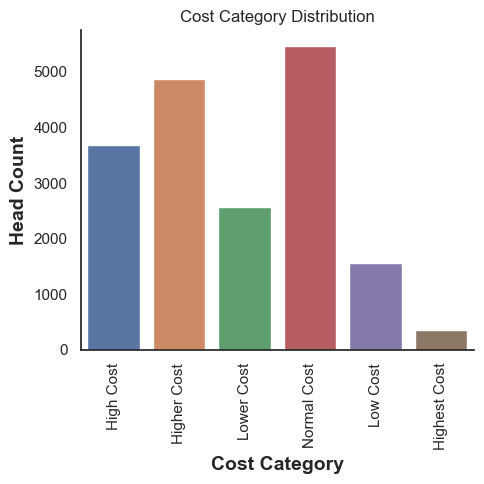

In [14]:
#Distribution of the target class.
sns.set(style="white", color_codes=True)

ax=sns.catplot(x="cost_category", data=train, kind="count")
plt.title("Cost Category Distribution")
plt.xlabel("Cost Category", weight="bold", size=14)
plt.ylabel("Head Count", weight="bold", size=14)
ax.set_xticklabels(rotation=90)
save_fig("Cost_Category_Dist", tight_layout=True)
plt.show()

In [15]:
print(train[train['cost_category']=='Highest Cost'].iloc[np.random.randint(0,100)])

Tour_ID                               tour_idloxn5yuw
country                      UNITED STATES OF AMERICA
age_group                                         65+
travel_with              With Other Friends/Relatives
total_female                                      1.0
total_male                                        1.0
purpose                          Leisure and Holidays
main_activity                        Wildlife Tourism
info_source                                Trade fair
tour_arrangement                         Package Tour
package_transport_int                              No
package_accomodation                              Yes
package_food                                      Yes
package_transport_tz                              Yes
package_sightseeing                               Yes
package_guided_tour                               Yes
package_insurance                                  No
night_mainland                                      6
night_zanzibar              

 Figure 'Cost category by Age group' Saved.


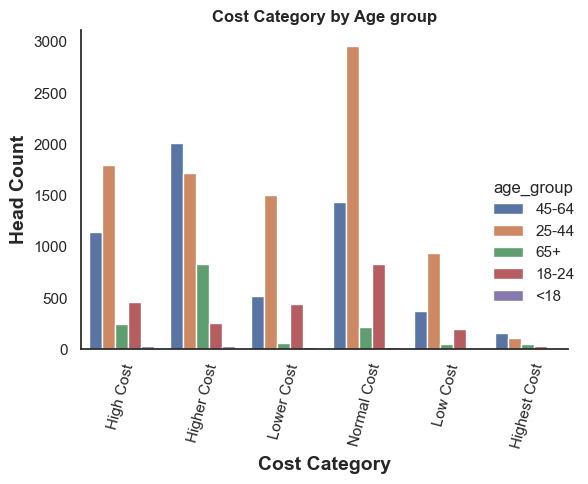

In [16]:
sns.set(style="white", color_codes=True)

ax =sns.catplot(x="cost_category", data=train, kind="count", hue="age_group")
plt.title("Cost Category by Age group", weight="bold")
plt.xlabel("Cost Category", size=14, weight="bold")
plt.ylabel("Head Count", weight="bold", size=14)
ax.set_xticklabels(rotation=75)
save_fig("Cost category by Age group", tight_layout=True)
plt.show();

 Figure 'Cost category by Travel With' Saved.


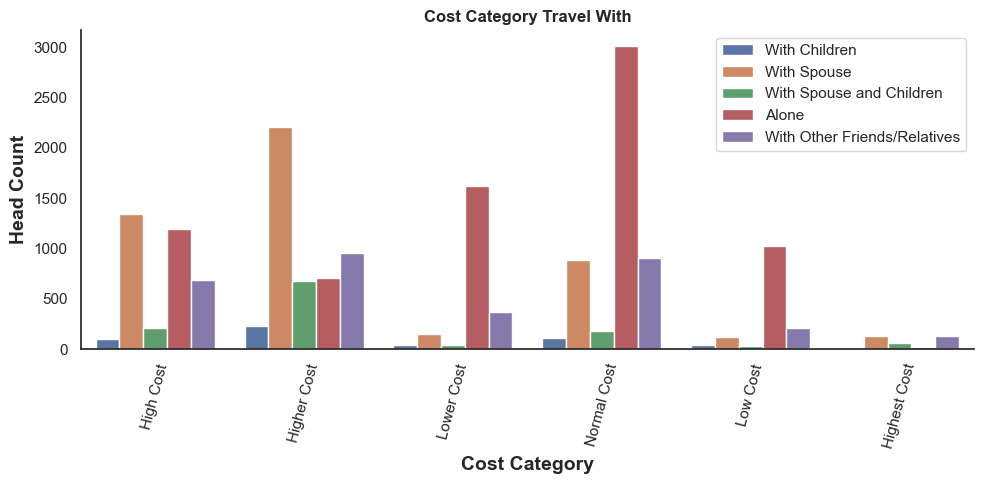

In [17]:
sns.set(style="white", color_codes=True)

ax =sns.catplot(x="cost_category", data=train, kind="count", hue="travel_with", aspect=2.0, legend_out=False)
plt.title("Cost Category Travel With", weight="bold")
plt.xlabel("Cost Category", size=14, weight="bold")
plt.ylabel("Head Count", weight="bold", size=14)
ax.set_xticklabels(rotation=75)
plt.legend(loc="upper right")
save_fig("Cost category by Travel With", tight_layout=True)
plt.show();

 Figure 'Cost category by group size' Saved.


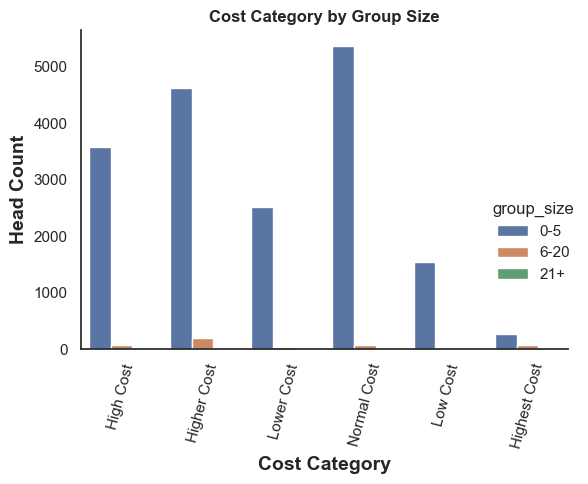

In [18]:
train['total_people']=train["total_female"]+ train["total_male"]
bins=[0,5,20,100]
labels=["0-5", "6-20", '21+']

train['group_size']=pd.cut(train['total_people'], bins=bins, labels=labels)

sns.set(style="white", color_codes=True)

ax =sns.catplot(x="cost_category", data=train, kind="count", hue="group_size")
plt.title("Cost Category by Group Size", weight="bold")
plt.xlabel("Cost Category", size=14, weight="bold")
plt.ylabel("Head Count", weight="bold", size=14)
ax.set_xticklabels(rotation=75)
save_fig("Cost category by group size", tight_layout=True)
plt.show();

In [19]:
print(f"{train.group_size.value_counts()}\n\nMaximum number of people in one travel group: {train.total_people.max()}\n\nFrequent number of people in one travel group: {train.total_people.mode()}")

0-5     17901
6-20      476
21+        27
Name: group_size, dtype: int64

Maximum number of people in one travel group: 93.0

Frequent number of people in one travel group: 0    1.0
Name: total_people, dtype: float64


 Figure 'Cost category by first trip to TZ' Saved.


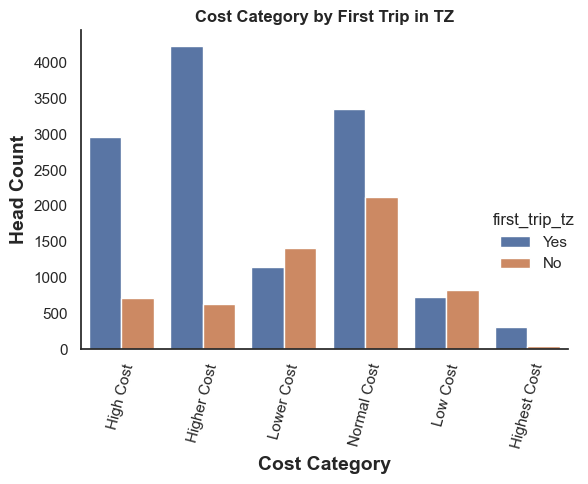

In [20]:
sns.set(style="white", color_codes=True)

ax =sns.catplot(x="cost_category", data=train, kind="count", hue="first_trip_tz")
plt.title("Cost Category by First Trip in TZ", weight="bold")
plt.xlabel("Cost Category", size=14, weight="bold")
plt.ylabel("Head Count", weight="bold", size=14)
ax.set_xticklabels(rotation=75)
save_fig("Cost category by first trip to TZ", tight_layout=True)
plt.show();

 Figure 'Info Source vs First Trip Tz' Saved.


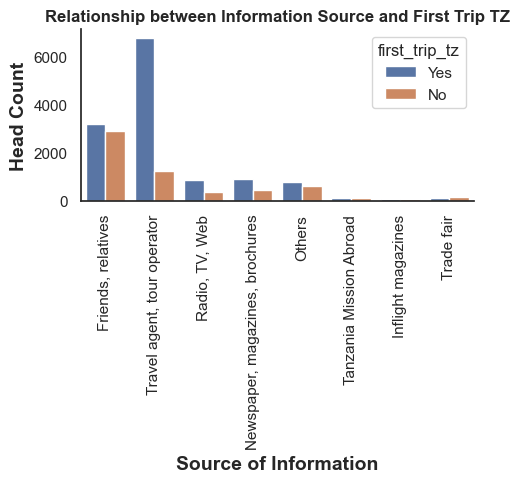

In [21]:
sns.set(style="white", color_codes=True)

ax =sns.catplot(x="info_source", data=train, kind="count", hue="first_trip_tz", legend_out=False)
plt.title("Relationship between Information Source and First Trip TZ", weight="bold")
plt.xlabel("Source of Information", size=14, weight="bold")
plt.ylabel("Head Count", weight="bold", size=14)
ax.set_xticklabels(rotation=90)
#plt.legend(loc="upper right")
save_fig("Info Source vs First Trip Tz", tight_layout=True)
plt.show();

 Figure 'Cost category by Info Source' Saved.


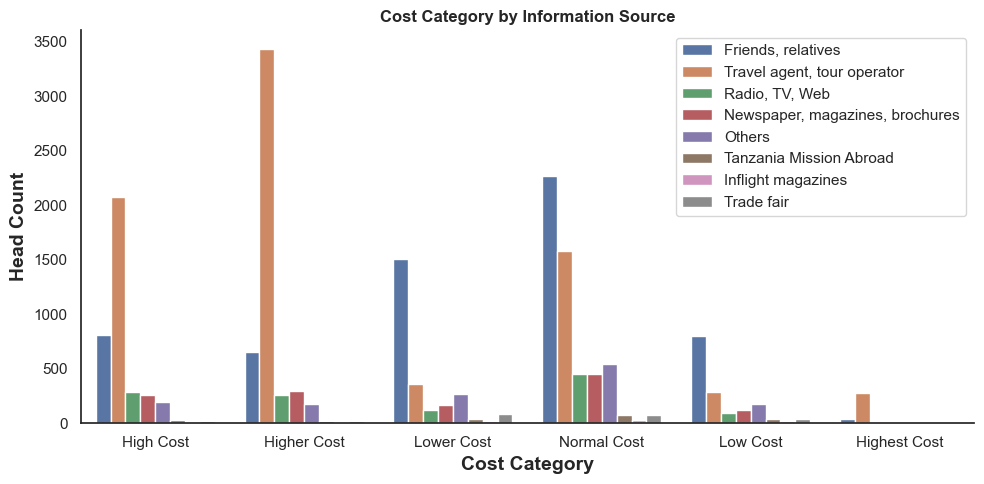

In [22]:
sns.set(style="white", color_codes=True)

ax =sns.catplot(x="cost_category", data=train, kind="count", hue="info_source", aspect=2.0, legend_out=False)
plt.title("Cost Category by Information Source", weight="bold")
plt.xlabel("Cost Category", size=14, weight="bold")
plt.ylabel("Head Count", weight="bold", size=14)
ax.set_xticklabels(rotation=0)
plt.legend(loc="upper right")
save_fig("Cost category by Info Source", tight_layout=True)
plt.show();

### Visualizing relationships Between Categorical Variables.

In [48]:
def plot_categorical(data, x, y, title=None, xlabel=None, ylabel=None):
    ct=pd.crosstab(data[x], data[y])
    
    fig, axes=plt.subplots(nrows=1,ncols=2, figsize=(12,8))
    
    sns.heatmap(ct, cmap='viridis', annot=True, cbar=True, fmt='g', ax=axes[0])
    axes[0].set_title('Heatmap' if title is None else title)
    axes[0].set_xlabel(''if xlabel is None else xlabel)
    axes[0].set_ylabel('' if ylabel is None else ylabel)
    
    ct.plot(kind='bar', stacked=True, ax=axes[1])
    axes[1].set_title('Bar Chart' if title is None else title)
    axes[1].set_xlabel(f"{x}" if xlabel is None else xlabel)
    axes[1].set_ylabel('counts' if ylabel is None else ylabel)
    axes[1].legend(title=y)
    
   
    fig.suptitle(f"Relationship between {x} and {y}", fontsize=16, weight='bold')
    

 Figure 'Cost Category and Info Source' Saved.


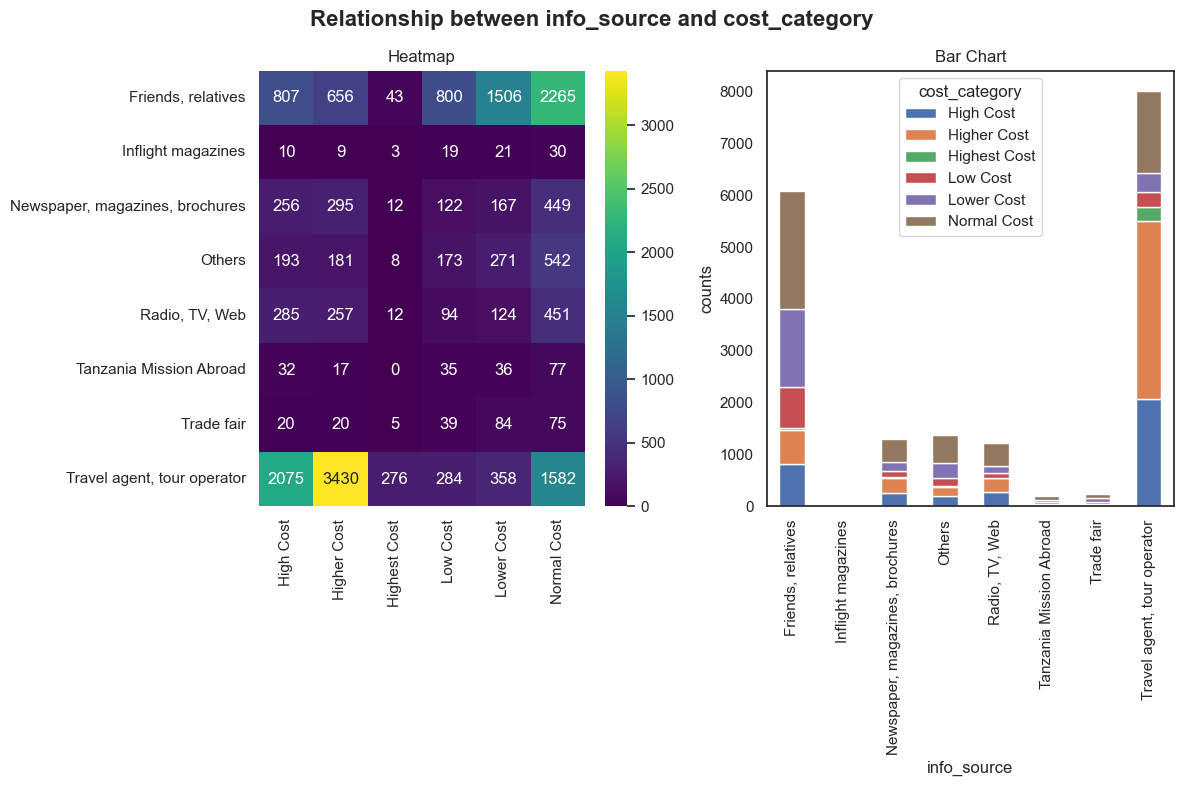

In [49]:
plot_categorical(train, "info_source", "cost_category")
save_fig("Cost Category and Info Source")

 Figure 'Relationship between Cost category and Information source' Saved.


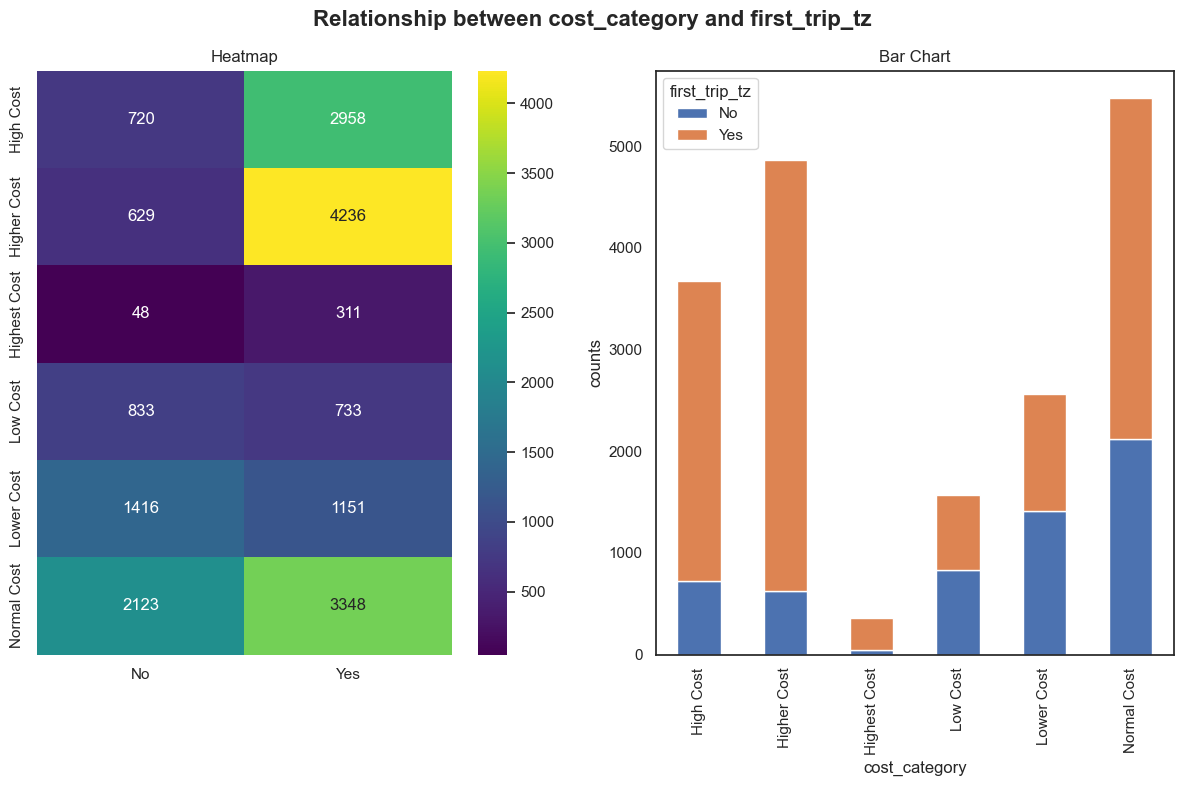

In [53]:
plot_categorical(train, "cost_category", "first_trip_tz")
save_fig("Relationship between Cost category and Information source")

 Figure 'Relationship between cost category and purpose of visit' Saved.


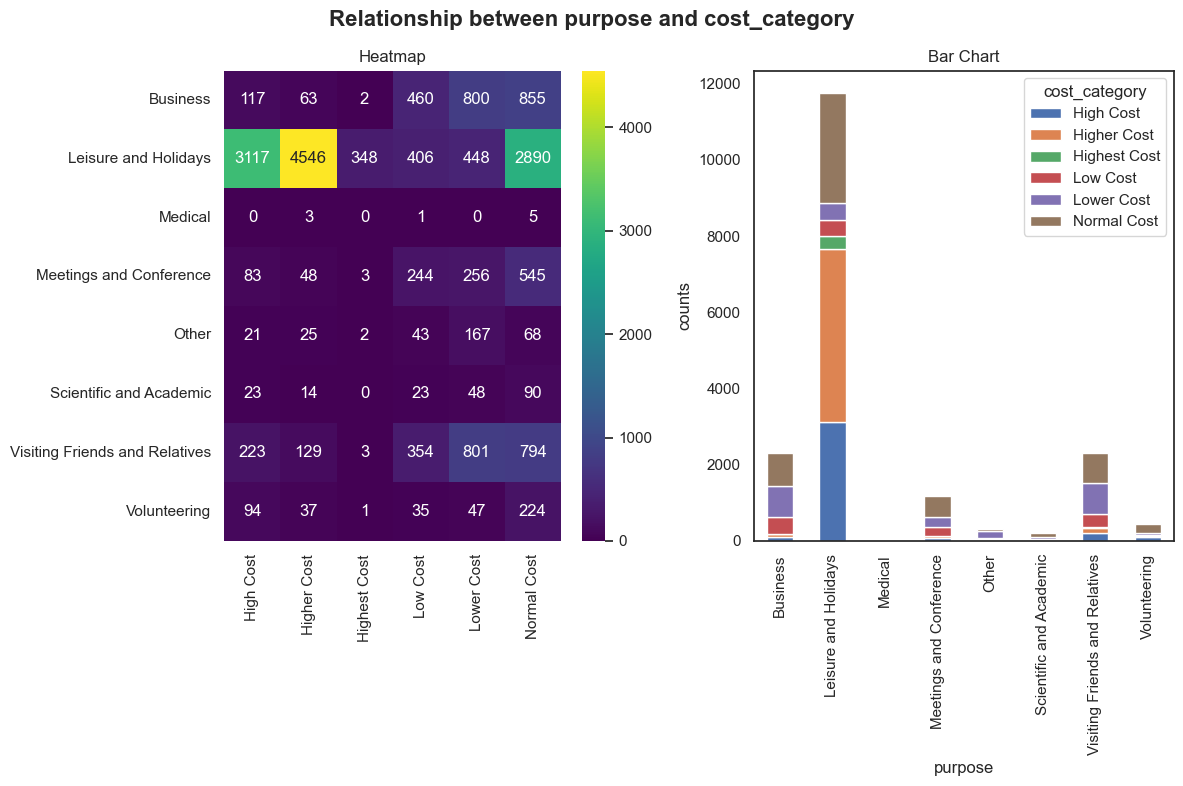

In [51]:
plot_categorical(train, "purpose", "cost_category")
save_fig("Relationship between cost category and purpose of visit")

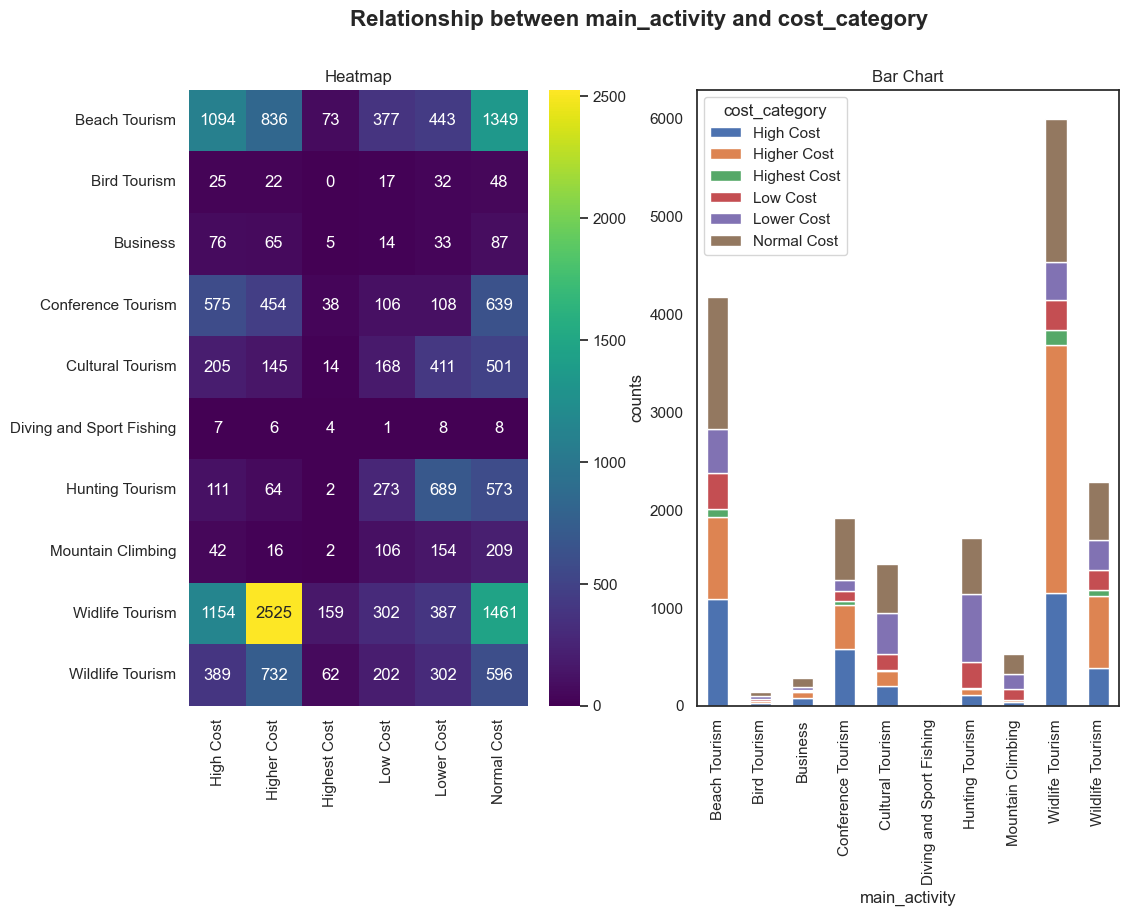

In [54]:
plot_categorical(train, "main_activity", "cost_category")

 Figure 'Relationship between cost category and main activity of the visit' Saved.


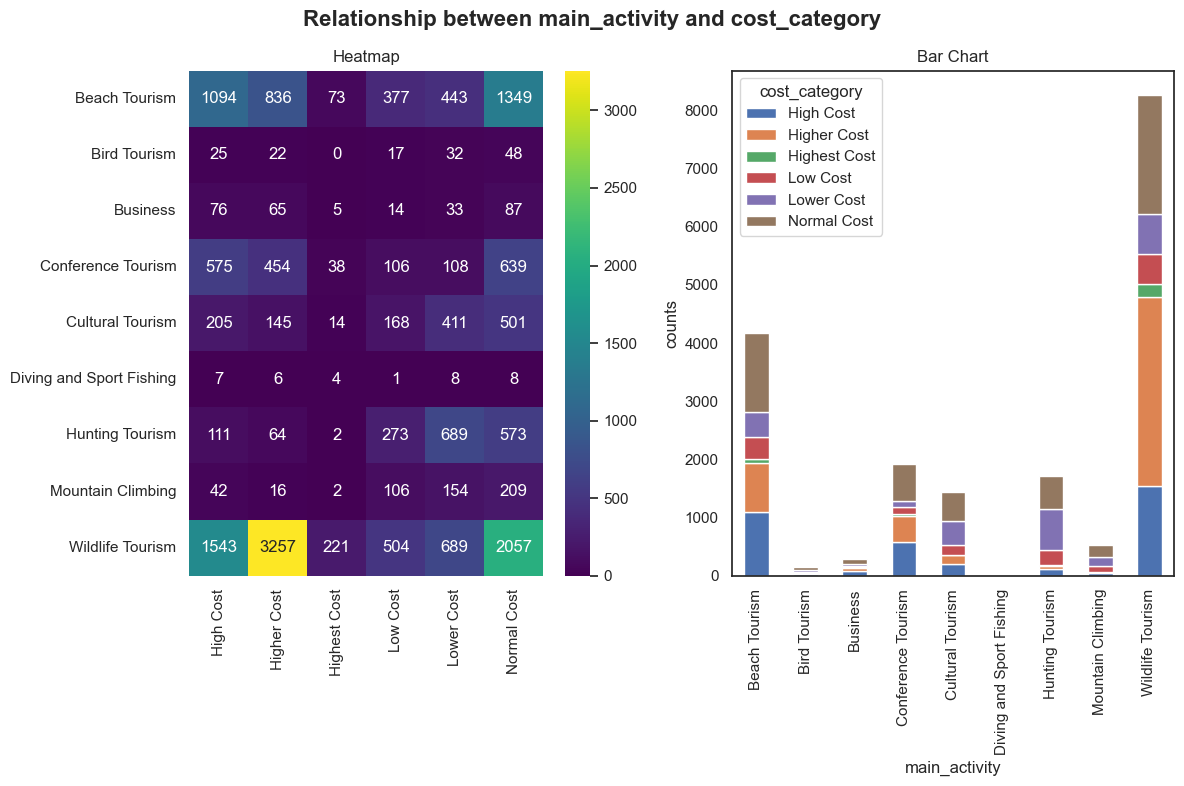

In [55]:
train['main_activity']=train['main_activity'].replace('Widlife Tourism','Wildlife Tourism')
plot_categorical(train, "main_activity", "cost_category")
save_fig("Relationship between cost category and main activity of the visit")

 Figure 'Cost category as per travel groups' Saved.


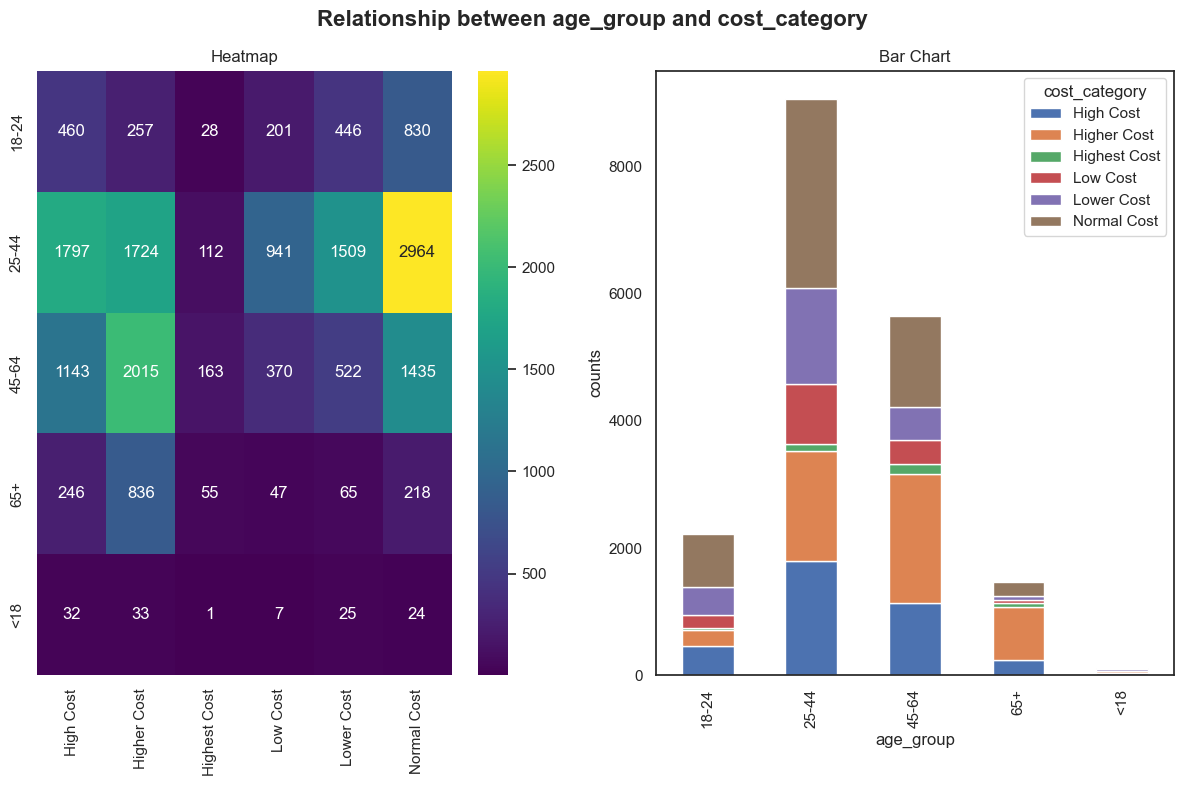

In [69]:
plot_categorical(train, "age_group", "cost_category")
save_fig("Cost category as per travel groups")

 Figure 'Relationship between travel with and age group' Saved.


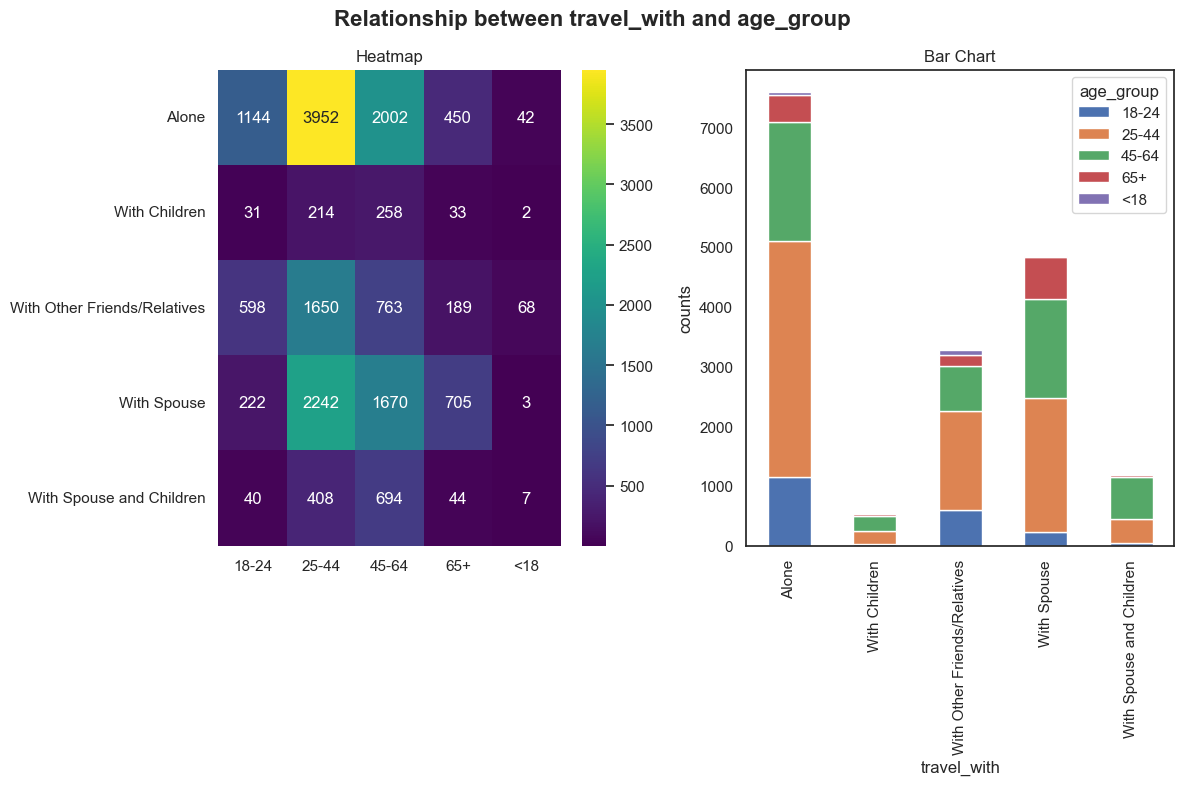

In [71]:
plot_categorical(train,"travel_with", "age_group")
save_fig("Relationship between travel with and age group")

 Figure 'Cost Category by Top 5 country of origin' Saved.


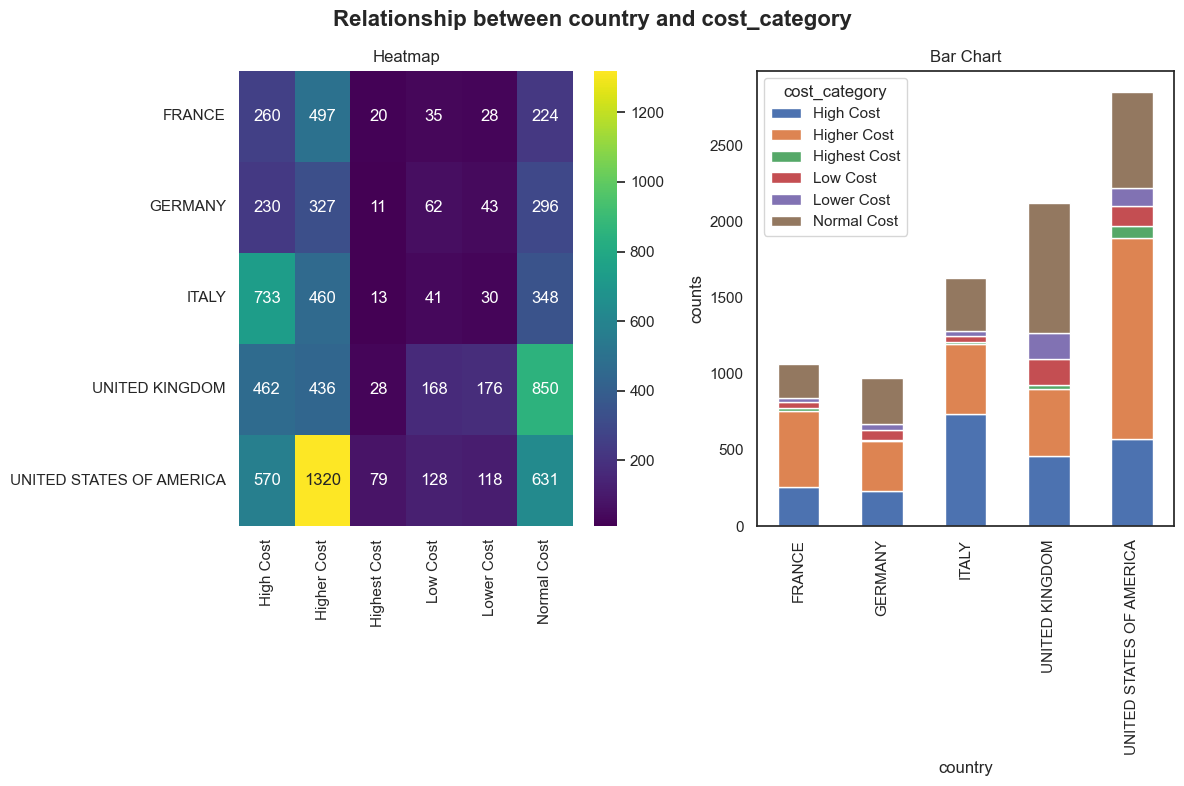

In [73]:
country = train.country.value_counts()[:5].index.tolist()
plot_categorical(train.loc[train.country.isin(country)], "country", "cost_category")
save_fig("Cost Category by Top 5 country of origin")

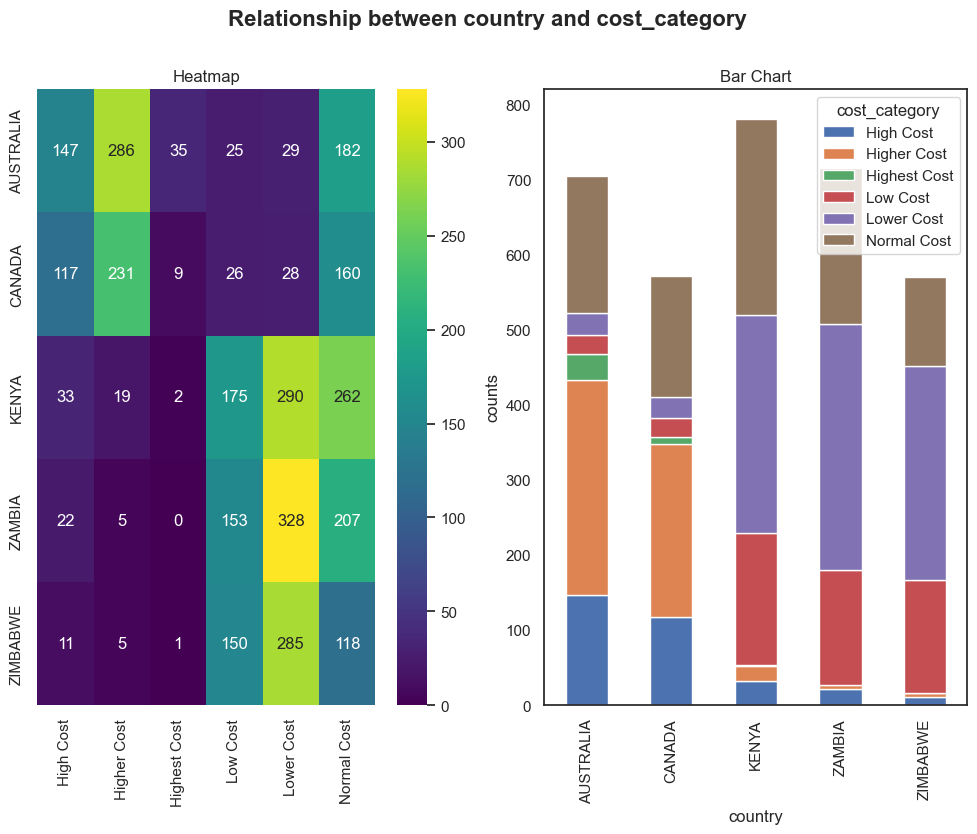

In [74]:
country=train.country.value_counts()[6:11].index.tolist()
plot_categorical(train.loc[train.country.isin(country)], "country", "cost_category")

In [78]:
grouped=train.groupby('country')['cost_category'].value_counts().sort_values(ascending=False)
grouped[:5]

country                   cost_category
UNITED STATES OF AMERICA  Higher Cost      1320
UNITED KINGDOM            Normal Cost       850
ITALY                     High Cost         733
UNITED STATES OF AMERICA  Normal Cost       631
                          High Cost         570
Name: cost_category, dtype: int64

In [79]:
location=train['country'].value_counts().sort_values(ascending=False)
location=pd.DataFrame(dict(zip(location.index, location.values)), index=[0]).\
                      melt(var_name='country', value_name='count')
location.loc[:10]

,country,count
0,UNITED STATES OF AMERICA,2846
1,UNITED KINGDOM,2120
2,ITALY,1625
3,FRANCE,1064
4,GERMANY,969
5,SOUTH AFRICA,811
6,KENYA,781
7,ZAMBIA,715
8,AUSTRALIA,704
9,CANADA,571


 Figure 'Cost Category by Length of the Trip' Saved.


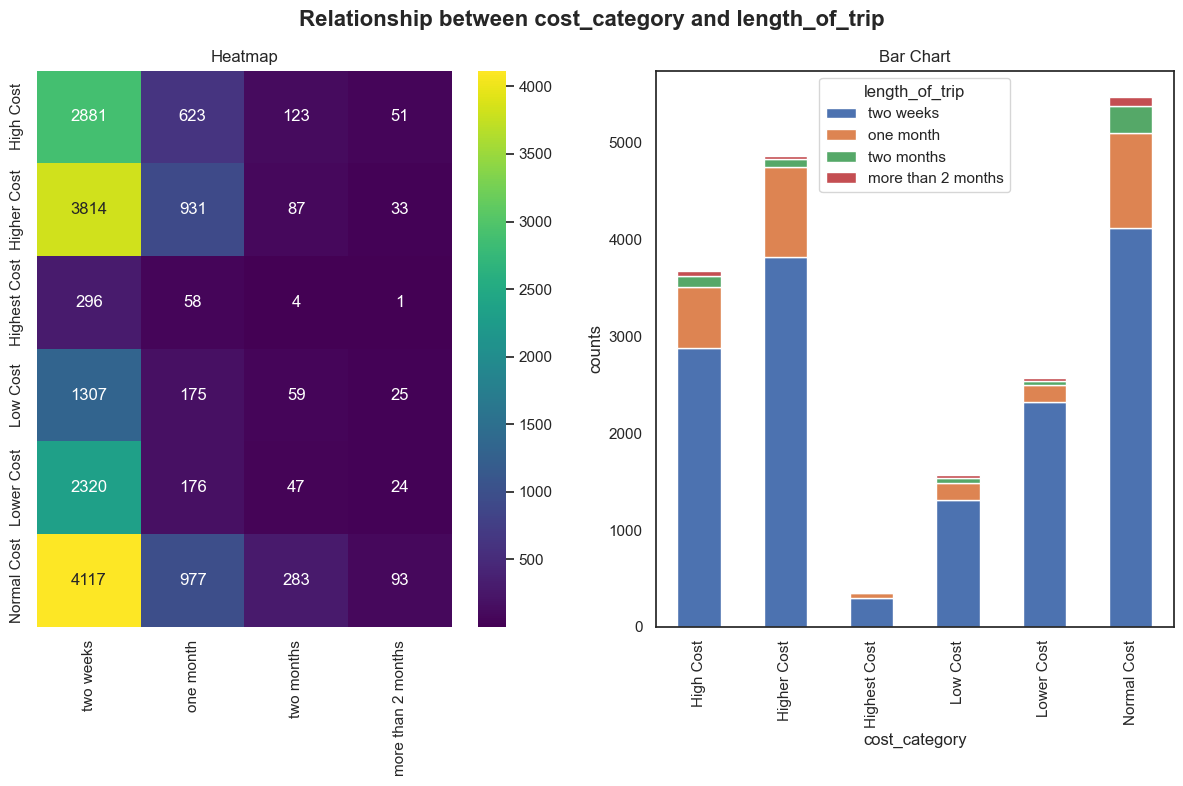

In [80]:
train['total_nights']=train['night_mainland']+train['night_zanzibar']
bins=[0,14,30,60,365]
labels=["two weeks","one month","two months", "more than 2 months"]
train['length_of_trip']=pd.cut(train['total_nights'], bins=bins, labels=labels)
plot_categorical(train, 'cost_category', 'length_of_trip')
save_fig('Cost Category by Length of the Trip')

### Preprocessing.

In [83]:
train.set_index('Tour_ID', inplace=True)

In [84]:
train.keys()

Index(['country', 'age_group', 'travel_with', 'total_female', 'total_male',
       'purpose', 'main_activity', 'info_source', 'tour_arrangement',
       'package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
       'package_insurance', 'night_mainland', 'night_zanzibar',
       'first_trip_tz', 'cost_category', 'total_people', 'group_size',
       'nights_zanzibar', 'nights_mainland', 'total_nights', 'length_of_trip'],
      dtype='object')

In [130]:
def chi(x, y):
    from scipy.stats import chi2_contingency

    ct=pd.crosstab(x ,y)#, data['night_zanzibar']])

    chi2, p, dof, expected=chi2_contingency(ct)

    print("Chi-squared test results:")
    print("  - Chi2 score: ", chi2)
    print("  - P-value: ", p)
    print("  - Degrees of freedom: ", dof)
    print("  - Expected frequencies: ")
    print(expected)

In [131]:
chi(train['cost_category'], train['travel_with'])

Chi-squared test results:
  - Chi2 score:  4358.8256594511395
  - P-value:  0.0
  - Degrees of freedom:  20
  - Expected frequencies: 
[[1539.6844702   109.13705467  662.93660719  982.23349205  242.00837588]
 [2081.36079399  147.53255694  896.16430497 1327.79301245  327.14933165]
 [ 153.70718834   10.89518674   66.18117148   98.05668063   24.15977282]
 [ 621.79565143   44.07457977  267.72439906  396.67121795   97.7341518 ]
 [ 972.75314096   68.95140841  418.83494923  620.56267569  152.89782571]
 [2220.69875509  157.40921347  956.15856807 1416.68292123  349.05054214]]


In [133]:
train.columns

Index(['country', 'age_group', 'travel_with', 'total_female', 'total_male',
       'purpose', 'main_activity', 'info_source', 'tour_arrangement',
       'package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
       'package_insurance', 'night_mainland', 'night_zanzibar',
       'first_trip_tz', 'cost_category', 'total_people', 'group_size',
       'nights_zanzibar', 'nights_mainland', 'total_nights', 'length_of_trip'],
      dtype='object')

In [135]:
col_drop=['total_female', 'total_male','group_size', 'nights_zanzibar', 'nights_mainland', 'total_nights', 'length_of_trip']
print(f"Shape of train before dropping some columns: {train.shape}")
train=train.drop(columns=col_drop)
print(f"Shape of train after dropping some columns: {train.shape}")

Shape of train before dropping some columns: (18506, 26)
Shape of train after dropping some columns: (18506, 19)


In [303]:
training=train.copy()

In [304]:
X=training.drop('cost_category', axis=1)
y=training['cost_category']

In [267]:
X.shape, y.shape

((18506, 18), (18506,))

In [268]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18506 entries, tour_id1hffseyw to tour_idceoq9por
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                18506 non-null  object 
 1   age_group              18506 non-null  object 
 2   travel_with            17431 non-null  object 
 3   purpose                18506 non-null  object 
 4   main_activity          18506 non-null  object 
 5   info_source            18506 non-null  object 
 6   tour_arrangement       18506 non-null  object 
 7   package_transport_int  18506 non-null  object 
 8   package_accomodation   18506 non-null  object 
 9   package_food           18506 non-null  object 
 10  package_transport_tz   18506 non-null  object 
 11  package_sightseeing    18506 non-null  object 
 12  package_guided_tour    18506 non-null  object 
 13  package_insurance      18506 non-null  object 
 14  night_mainland         18506 non-nu

In [269]:
cat=[]
text=[]

for col in X.select_dtypes(['object', 'category']).columns:
    unique_val= len(X[col].unique())
    
    if unique_val <= 10:
        cat.append(col)
    else:
        text.append(col)  
        
num=[col for col in X.select_dtypes(['int', 'float']).columns]

print(f"Categorical Columns: {cat}\n\nNumerical Columns: {num}\n\nText Columns: {text}")

Categorical Columns: ['age_group', 'travel_with', 'purpose', 'main_activity', 'info_source', 'tour_arrangement', 'package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz', 'package_sightseeing', 'package_guided_tour', 'package_insurance', 'first_trip_tz']

Numerical Columns: ['night_mainland', 'night_zanzibar', 'total_people']

Text Columns: ['country']


In [270]:
len(cat), len(num), len(text)

(14, 3, 1)

In [271]:
X.isnull().sum()

country                     0
age_group                   0
travel_with              1075
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
first_trip_tz               0
total_people                8
dtype: int64

In [272]:
p_missing=X.isnull().sum()*100/len(X)
missing=pd.DataFrame({"columns":X.columns,
                         "percentage missing": p_missing})
missing.reset_index(drop=True, inplace=True)
missing

,columns,percentage missing
0,country,0.000000
1,age_group,0.000000
2,travel_with,5.808927
3,purpose,0.000000
4,main_activity,0.000000
5,info_source,0.000000
6,tour_arrangement,0.000000
7,package_transport_int,0.000000
8,package_accomodation,0.000000
9,package_food,0.000000


### Pipelines to preprocess the data

In [305]:
num_pipeline=Pipeline([
    ("imputer", KNNImputer(n_neighbors=3)),
    ("scaler", StandardScaler()),
])

cat_pipeline=Pipeline([
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("vectorizer", OneHotEncoder()),
])

text_pipeline=Pipeline([
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(sparse_output=False)),

])

preprocessor=ColumnTransformer([
    ("cat", cat_pipeline, cat),
    ("num", num_pipeline, num),
    ("text", text_pipeline, text),
], remainder="passthrough")

pipe=Pipeline([
    ("preprocessor", preprocessor)
])


In [306]:
X=pipe.fit_transform(X)
X

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [307]:
X.shape

(18506, 187)

In [308]:
y.shape

(18506,)

In [309]:
le=LabelEncoder()
y=le.fit_transform(y)
y

array([0, 0, 1, ..., 1, 1, 3])

In [310]:
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'High Cost': 0, 'Higher Cost': 1, 'Highest Cost': 2, 'Low Cost': 3, 'Lower Cost': 4, 'Normal Cost': 5}


### Building the models

In [311]:
X_train,X_test, y_train,y_test=train_test_split(X, y, test_size=0.3, 
                                                stratify=y, shuffle=True,  
                                                random_state=42) 
print(f"X_train shape: {X_train.shape}\nX_test Shape: {X_test.shape}\ny_train shape: {y_train.shape}\ny_test shape: {y_test.shape}")

X_train shape: (12954, 187)
X_test Shape: (5552, 187)
y_train shape: (12954,)
y_test shape: (5552,)


In [312]:
rf=RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [313]:
y_pred=rf.predict(X_test)

scores=cross_val_score(rf, X_train, y_train, cv=10)
scores.mean()

<IPython.core.display.Javascript object>

0.5504875709042375

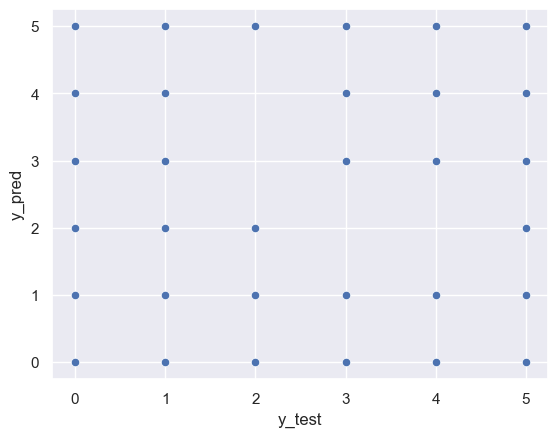

In [314]:
sns.scatterplot(y_test, y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show();

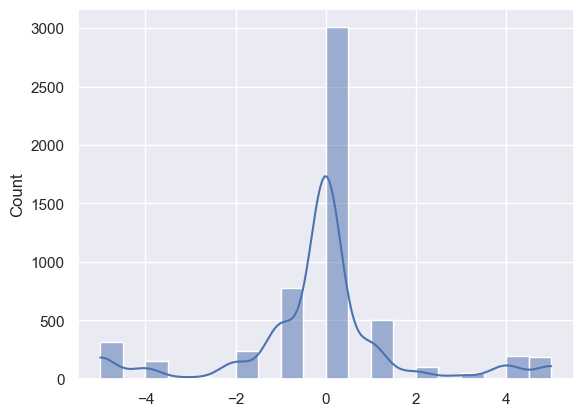

In [315]:
sns.histplot((y_test-y_pred), kde=True, bins=20);

In [316]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.36      0.41      1103
           1       0.63      0.76      0.69      1460
           2       0.17      0.04      0.06       108
           3       0.27      0.11      0.16       470
           4       0.54      0.52      0.53       770
           5       0.53      0.64      0.58      1641

    accuracy                           0.54      5552
   macro avg       0.43      0.40      0.40      5552
weighted avg       0.52      0.54      0.52      5552



In [317]:
tree=DecisionTreeClassifier(random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [318]:
y_pred=tree.predict(X_test)

In [319]:
scores=cross_val_score(tree, X_train, y_train, cv=5)
scores.mean()

<IPython.core.display.Javascript object>

0.4629457477547018

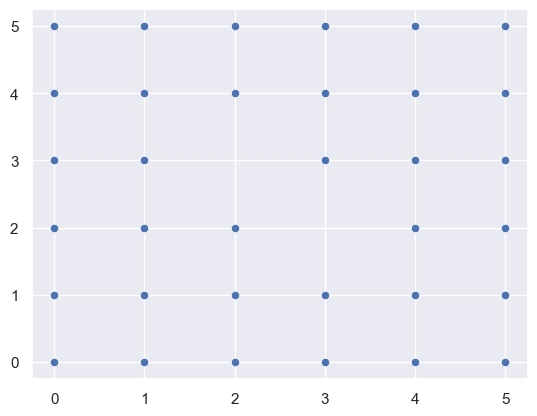

In [320]:
sns.scatterplot(y_test, y_pred);

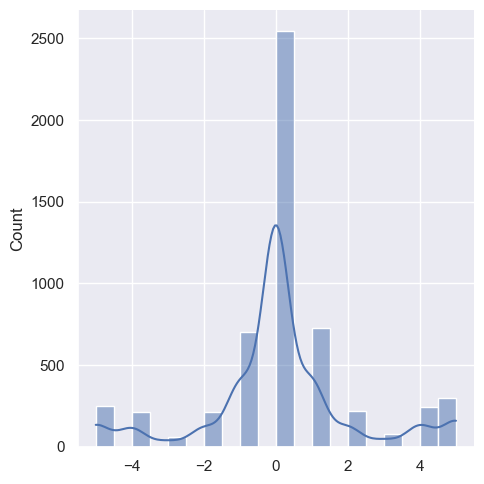

In [321]:
sns.displot((y_test-y_pred), kde=True, bins=20);

In [322]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.39      0.42      0.40      1103
           1       0.58      0.58      0.58      1460
           2       0.08      0.08      0.08       108
           3       0.21      0.20      0.21       470
           4       0.48      0.47      0.47       770
           5       0.49      0.47      0.48      1641

    accuracy                           0.46      5552
   macro avg       0.37      0.37      0.37      5552
weighted avg       0.46      0.46      0.46      5552



In [323]:
from sklearn.neural_network import MLPClassifier
nn=MLPClassifier(hidden_layer_sizes=(32,64,64,32))
nn.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(32, 64, 64, 32))

In [324]:
y_pred=nn.predict(X_test)
scores=cross_val_score(nn, X_train, y_train, cv=5)
scores.mean()

<IPython.core.display.Javascript object>

0.5010043080517801

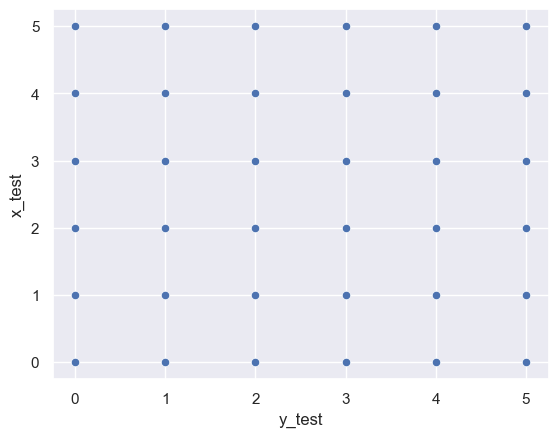

In [325]:
sns.scatterplot(y_test, y_pred)
plt.xlabel("y_test")
plt.ylabel("x_test")
plt.show();

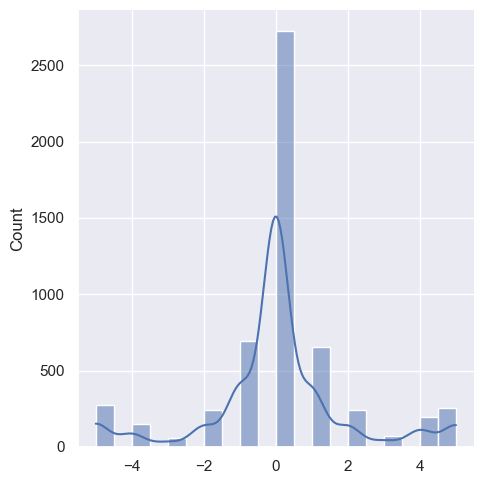

In [326]:
sns.displot((y_test-y_pred), kde=True, bins=20);

In [327]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.40      0.40      1103
           1       0.62      0.64      0.63      1460
           2       0.12      0.15      0.13       108
           3       0.22      0.23      0.22       470
           4       0.55      0.47      0.51       770
           5       0.52      0.53      0.52      1641

    accuracy                           0.49      5552
   macro avg       0.40      0.40      0.40      5552
weighted avg       0.49      0.49      0.49      5552



In [328]:
model = XGBClassifier(
    n_estimators=200,
    max_depth=8,
    objective= "multi:softprob",
    tree_method="hist",
    learning_rate=0.01,
    n_jobs=-1,
    random_state=1
)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [329]:
y_pred=model.predict(X_test)

In [330]:
scores=cross_val_score(model, X_train, y_train, cv=5)
scores.mean()

<IPython.core.display.Javascript object>

0.5721013189403772

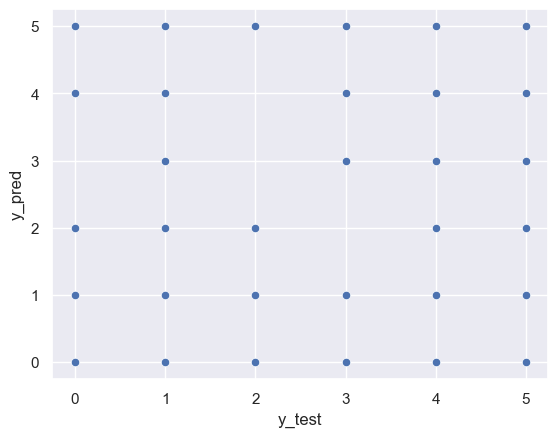

In [331]:
sns.scatterplot(y_test, y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show();

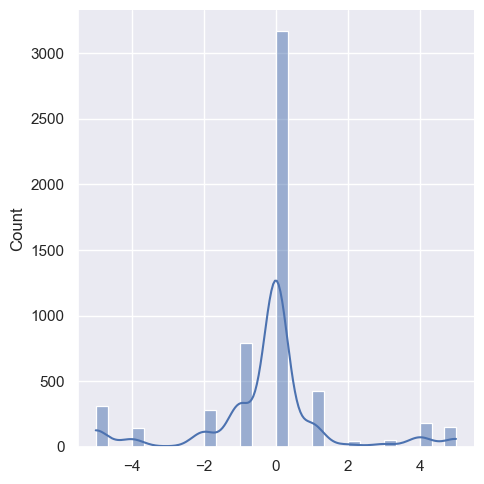

In [332]:
sns.displot((y_test-y_pred), kde=True, bins=30);

In [333]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.37      0.43      1103
           1       0.64      0.78      0.70      1460
           2       0.26      0.08      0.13       108
           3       0.29      0.02      0.03       470
           4       0.58      0.59      0.58       770
           5       0.54      0.71      0.61      1641

    accuracy                           0.57      5552
   macro avg       0.47      0.42      0.41      5552
weighted avg       0.54      0.57      0.54      5552



In [334]:
from sklearn import ensemble

model=ensemble.GradientBoostingClassifier(
 n_estimators=150,
 learning_rate=0.1,
 max_depth=30,
 min_samples_split=4,
 min_samples_leaf=6,
 max_features=0.6,
 loss='log_loss'
)

model.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=30, max_features=0.6, min_samples_leaf=6,
                           min_samples_split=4, n_estimators=150)

In [335]:
y_pred=model.predict(X_test)

In [336]:
scores=cross_val_score(model, X_train, y_train, cv=5)
scores.mean()

<IPython.core.display.Javascript object>

0.5351244655914668

<AxesSubplot: >

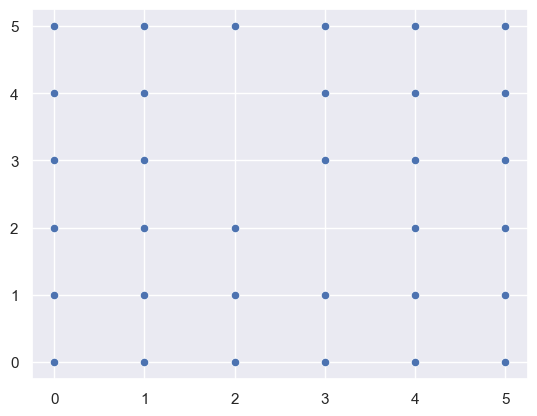

In [337]:
sns.scatterplot(y_test, y_pred)

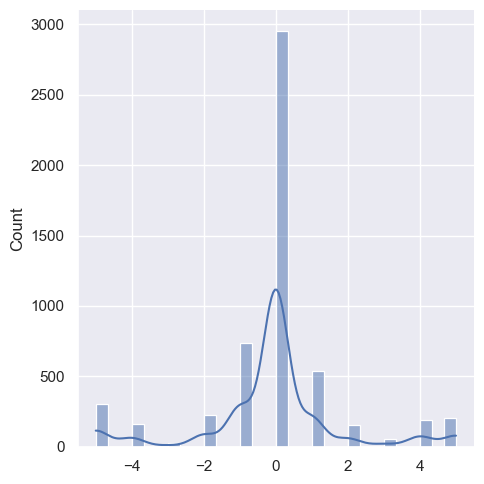

In [338]:
sns.displot((y_test-y_pred), kde=True, bins=30)

In [339]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.39      0.42      1103
           1       0.63      0.71      0.67      1460
           2       0.23      0.10      0.14       108
           3       0.26      0.16      0.20       470
           4       0.55      0.51      0.53       770
           5       0.53      0.61      0.57      1641

    accuracy                           0.53      5552
   macro avg       0.44      0.41      0.42      5552
weighted avg       0.51      0.53      0.52      5552



In [340]:
svm=SVC(gamma="auto", kernel='rbf')
svm.fit(X_train, y_train)

SVC(gamma='auto')

In [341]:
y_pred=svm.predict(X_test)

In [342]:
scores=cross_val_score(svm, X_train, y_train, cv=5)
scores.mean()

<IPython.core.display.Javascript object>

0.5533424133732895

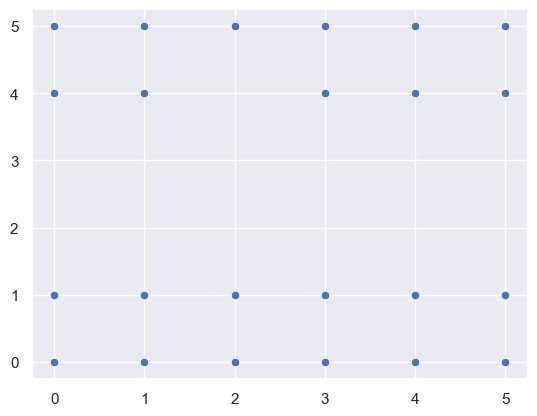

In [343]:
sns.scatterplot(y_test, y_pred);

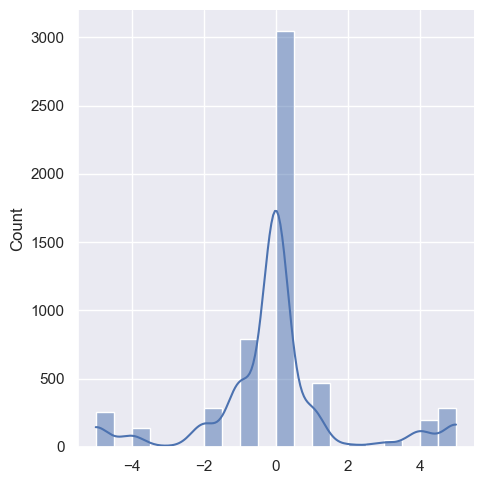

In [344]:
sns.displot((y_test-y_pred), kde=True, bins=20)

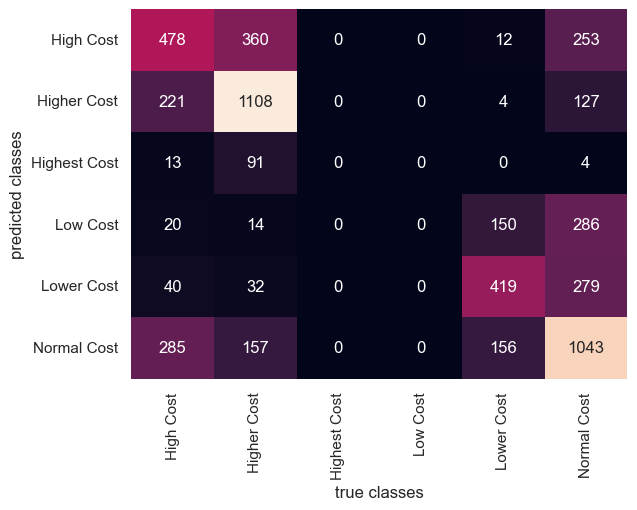

In [345]:
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cbar=False, fmt='d',
           xticklabels=le.classes_,
           yticklabels=le.classes_)
plt.xlabel("true classes")
plt.ylabel("predicted classes");

In [346]:
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

   High Cost       0.45      0.43      0.44      1103
 Higher Cost       0.63      0.76      0.69      1460
Highest Cost       0.00      0.00      0.00       108
    Low Cost       0.00      0.00      0.00       470
  Lower Cost       0.57      0.54      0.55       770
 Normal Cost       0.52      0.64      0.57      1641

    accuracy                           0.55      5552
   macro avg       0.36      0.40      0.38      5552
weighted avg       0.49      0.55      0.52      5552



In [347]:
from lightgbm import LGBMClassifier
lg=LGBMClassifier(
    num_leaves=50, max_depth= 8, learning_rate=0.01,
    n_estimators=100, objective="multiclass",
     random_state=1, n_jobs=-1 )
model=lg.fit(X_train, y_train)


In [348]:
y_pred=lg.predict(X_test)

scores=cross_val_score(lg, X_train, y_train, cv=5)
print(f"Cross Validation Score:  {scores.mean()*100}")

<IPython.core.display.Javascript object>

Cross Validation Score:  57.25640731430002


In [349]:
f1_score(y_test, y_pred, average=None)

array([0.40981735, 0.69845054, 0.03603604, 0.00423729, 0.57894737,
       0.61867209])

<AxesSubplot: >

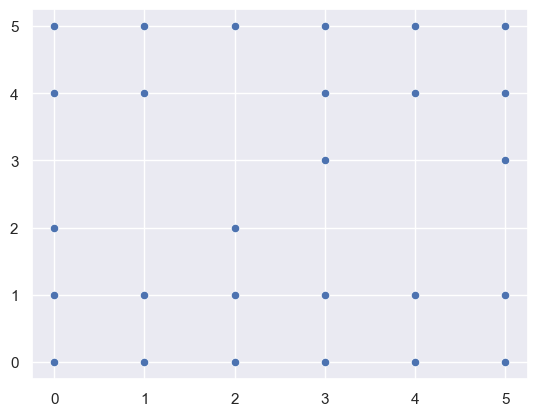

In [350]:
sns.scatterplot(y_test, y_pred)

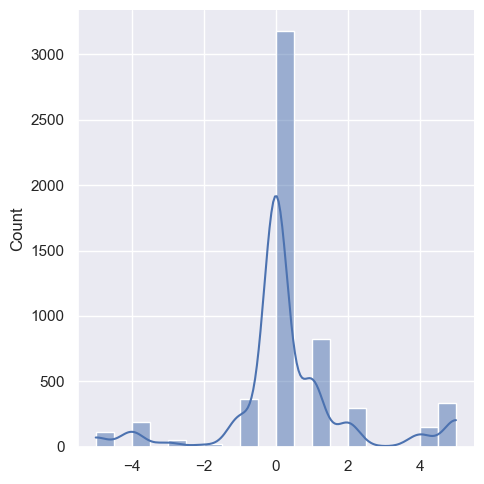

In [351]:
sns.displot((y_pred-y_test), kde=True, bins=20)

In [352]:
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

   High Cost       0.55      0.33      0.41      1103
 Higher Cost       0.62      0.80      0.70      1460
Highest Cost       0.67      0.02      0.04       108
    Low Cost       0.50      0.00      0.00       470
  Lower Cost       0.60      0.56      0.58       770
 Normal Cost       0.53      0.74      0.62      1641

    accuracy                           0.57      5552
   macro avg       0.58      0.41      0.39      5552
weighted avg       0.57      0.57      0.53      5552



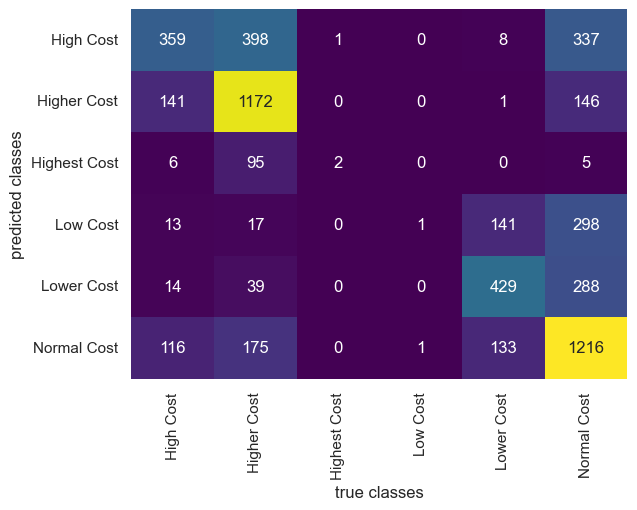

In [353]:
cm=confusion_matrix(y_test, y_pred)

sns.heatmap(cm, cmap='viridis', annot=True, fmt='d',cbar=False,
           xticklabels=le.classes_,
           yticklabels=le.classes_)
plt.xlabel("true classes")
plt.ylabel("predicted classes");

In [354]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_pred, average='weighted')

0.568254376624177

In [355]:
recall_score(y_test, y_pred, average='weighted')

0.5725864553314121